In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#read train and test files
train_file = pd.read_csv('mnist_train.txt')
test_f = pd.read_csv('mnist_test.txt')
test_file = test_f.iloc[:,0:784]

In [3]:
#print(test_file.shape)

In [4]:
df_x=train_file.iloc[:,1:]
df_y=train_file.iloc[:,0]

In [34]:
train_file.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
test_file.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
num_train,num_validation = int(len(train_file)*0.8),int(len(train_file)*0.2)
#num_train,num_validation

In [8]:
x_train,y_train=train_file.iloc[:num_train,1:].values,train_file.iloc[:num_train,0].values
x_validation,y_validation=train_file.iloc[num_train:,1:].values,train_file.iloc[num_train:,0].values
"""print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)"""

'print(x_train.shape)\nprint(y_train.shape)\nprint(x_validation.shape)\nprint(y_validation.shape)'

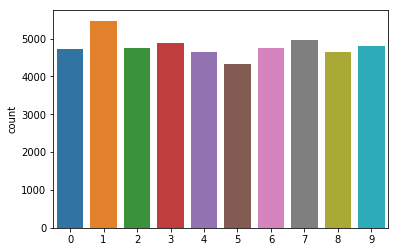

In [9]:
import seaborn as sns
sns.countplot(y_train)

Label: 1


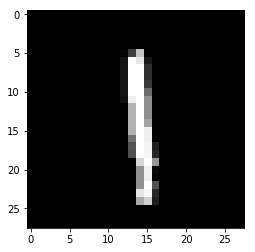

Label: 1


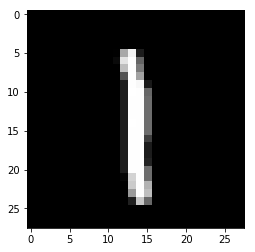

Label: 4


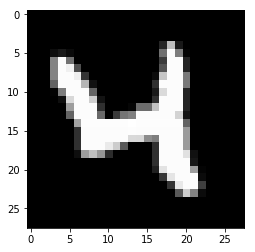

Label: 9


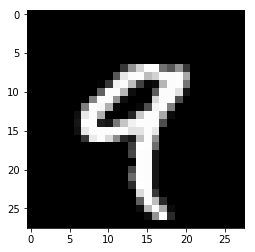

Label: 4


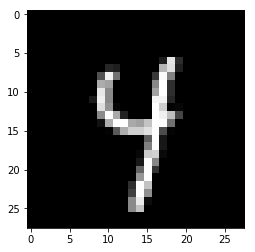

In [32]:
a = np.random.randint(1,30,5)
for index in a:
    #index=75
    print("Label: " + str(y_train[index]))
    plt.imshow(x_train[index].reshape((28,28)),cmap='gray')
    plt.show()

In [11]:
clf=RandomForestClassifier(n_estimators=200, max_depth=None, max_features="sqrt")
RF = clf.fit(x_train,y_train)
RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
prediction_validation = clf.predict(x_validation)
accuracy = accuracy_score(y_validation,prediction_validation)
error = 1 - accuracy
print("Validation Accuracy for Random Forest  : " ,accuracy)
print("Validation Error for Random Forest     : ", round(error, 4))
print("Error Percentage for Random Forest     : ",(round(error, 4) *100), "%")

Validation Accuracy for Random Forest  :  0.9720833333333333
Validation Error for Random Forest     :  0.0279
Error Percentage for Random Forest     :  2.79 %


In [13]:
from sklearn.metrics import classification_report
print ("Classification Report")
print(classification_report(y_validation, prediction_validation))
print ("Confusion Matrix Report")
cm = confusion_matrix(y_validation, prediction_validation)
print(cm)

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1194
           1       0.98      0.99      0.99      1272
           2       0.97      0.97      0.97      1196
           3       0.97      0.96      0.97      1242
           4       0.98      0.97      0.98      1187
           5       0.97      0.96      0.96      1097
           6       0.97      0.99      0.98      1170
           7       0.98      0.97      0.98      1297
           8       0.96      0.96      0.96      1198
           9       0.95      0.95      0.95      1147

   micro avg       0.97      0.97      0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000

Confusion Matrix Report
[[1182    0    3    0    0    0    2    0    5    2]
 [   0 1259    5    1    2    1    0    1    2    1]
 [   3    2 1155    5    4    1    4    7   12    3]
 [   2    0    7 1194    0   15    3

In [14]:
prediction_test = clf.predict(test_file)

In [15]:
display(prediction_test)

array([2, 1, 0, ..., 4, 5, 6])

In [16]:
results_data = pd.DataFrame({'ImageId': range(1, len(prediction_test)+1), 'Label': prediction_test})
results_data.to_csv('results.csv', sep=',', index=False)

Predicted 8 as 5


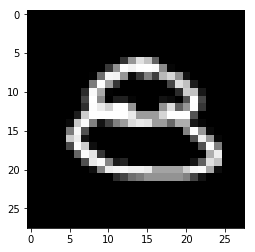

Predicted 4 as 9


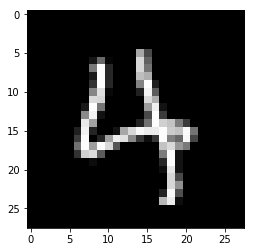

Predicted 4 as 9


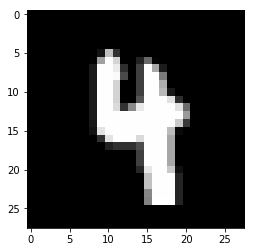

Predicted 9 as 5


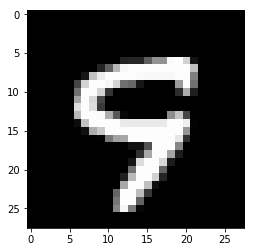

Predicted 3 as 8


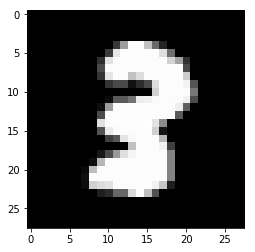

In [33]:
a = np.random.randint(1,30,5)
for index in a:
    #index=34
    print("Predicted " + str(y_validation[y_validation!=prediction_validation][index]) + " as " + 
         str(prediction_validation[y_validation!=prediction_validation][index]))
    plt.imshow(x_validation[y_validation!=prediction_validation][index].reshape((28,28)),cmap='gray')
    plt.show()

In [21]:
"""a = np.random.randint(1,30,5)
for index in a:
    #index=5
    print("Predicted " + str(prediction_test[index]))
    plt.imshow(test_file.iloc[index].values.reshape((28,28)),cmap='gray')
    plt.show()"""

'a = np.random.randint(1,30,5)\nfor index in a:\n    #index=5\n    print("Predicted " + str(prediction_test[index]))\n    plt.imshow(test_file.iloc[index].values.reshape((28,28)),cmap=\'gray\')\n    plt.show()'

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=200, random_state=1)

bagging = bag.fit(x_train,y_train)
bagging

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=200, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [23]:
prediction_validation = bag.predict(x_validation)
accuracy = accuracy_score(y_validation,prediction_validation)
error = 1 - accuracy
print("Validation Accuracy for bagging  : " ,accuracy)
print("Validation Error for bagging     : ", round(error, 4))
print("Error Percentage for bagging     : ",(round(error, 4) *100), "%")

Validation Accuracy for bagging  :  0.9608333333333333
Validation Error for bagging     :  0.0392
Error Percentage for bagging     :  3.92 %


In [25]:
import time
X_tr = df_x
Y_tr = df_y
ob_error = []
number_of_trees = [1,5,10,50,100,200,500]
for N_estimators in number_of_trees:
    tree = DecisionTreeClassifier()
    bag = BaggingClassifier(tree, n_estimators=N_estimators, oob_score=True, random_state=42)
    bagging = bag.fit(X_tr, Y_tr)
    #print("Total time consumed is %s seconds : " % (time.time() - start_time))
    oob_error = 1 - bagging.oob_score_
    ob_error = ob_error + [oob_error]
    #print(ob_error)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:611: RuntimeWarning: divide by zero encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:611: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:606: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:611: RuntimeWarning: divide by zero encountered in true_divide
  predictions.sum

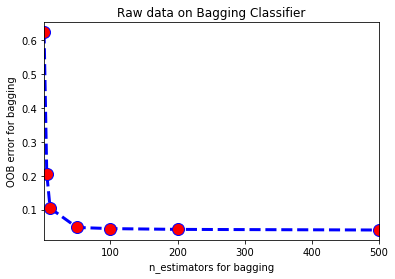

In [26]:
plt.plot(number_of_trees, ob_error, color='blue', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='red', markersize=12)
plt.xlim(1, 500)
plt.title("Raw data on Bagging Classifier")
plt.xlabel("n_estimators for bagging")
plt.ylabel("OOB error for bagging")
plt.show()

In [27]:
error = oob_error
accuracy = 1 - error

print("Accuracy Percentage   : ",(round(accuracy, 4) *100), "%")
print("Error Percentage      : ",(round(error, 4) *100), "%")

Accuracy Percentage   :  95.99 %
Error Percentage      :  4.01 %


In [28]:
import time
X_tr = df_x
Y_tr = df_y
ob_error = []
number_of_trees = [1,5,10,50,100,200,500]
for N_estimators in number_of_trees :
    start_time = time.time()
    clf = RandomForestClassifier(n_estimators=N_estimators,warm_start = True, oob_score =True, random_state = 42, 
                                max_features="sqrt")
    clf = clf.fit(X_tr, Y_tr)
    #print("Total time consumed is %s seconds : " % (time.time() - start_time))
    oob_error = 1 - clf.oob_score_
    ob_error = ob_error + [oob_error]
    #print(ob_error)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=

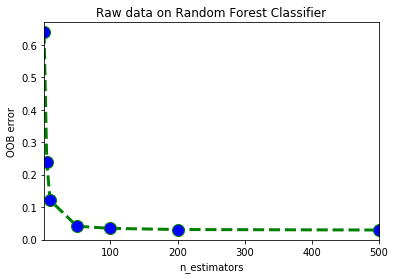

In [29]:
plt.plot(number_of_trees, ob_error, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
#plt.plot(N_estimators, oob_error, label=label)
plt.xlim(1, 500)
plt.title("Raw data on Random Forest Classifier")
plt.xlabel("n_estimators")
plt.ylabel("OOB error")
plt.show()

In [30]:
error = oob_error
accuracy = 1 - error

print("Accuracy Percentage   : ",(round(accuracy, 4) *100), "%")
print("Error Percentage      : ",(round(error, 4) *100), "%")

Accuracy Percentage   :  97.04 %
Error Percentage      :  2.96 %


In [ ]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

print(__doc__)

RANDOM_STATE = 123

# Pass dataset parameters.
X = df_x
y = df_y

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))





Automatically created module for IPython interactive environment


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=

In [ ]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)plt.xlim(min_estimators, max_estimators)
plt.title("OOB error rate vs n_estimators for Rand Forest Classifier")
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()